<a href="https://colab.research.google.com/github/rihamghoudi-bit/network-moniter/blob/main/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn ipywidgets graphviz -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import *
import re
from typing import List, Dict
import warnings
warnings.filterwarnings('ignore')

print("✅ Installation terminée!")
print(f"📦 Scikit-learn version: {__import__('sklearn').__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00
✅ Installation terminée!
📦 Scikit-learn version: 1.6.1


In [ ]:
print("="*70)
print("🔄 GÉNÉRATION DU GRAND DATASET")
print("="*70)

# CODES AVEC BUGS (50+ patterns)
buggy_codes = [
    # MEMORY LEAKS (10)
    "int main() { int *ptr = malloc(100 * sizeof(int)); for(int i=0; i<100; i++) ptr[i]=i; return 0; }",
    "void process() { char *buf = malloc(256); strcpy(buf, \"data\"); printf(\"%s\", buf); }",
    "int* create_array(int n) { int *arr = malloc(n * sizeof(int)); return arr; }",
    "void allocate() { char *data = calloc(100, 1); data[0] = 'A'; }",
    "int main() { for(int i=0; i<100; i++) { int *temp = malloc(50); *temp = i; } return 0; }",
    "void leak() { int *p = malloc(sizeof(int)*10); p[0] = 5; }",
    "char* get_string() { char *s = malloc(100); strcpy(s, \"hello\"); return s; }",
    "void process_data(int n) { int *arr = malloc(n*4); arr[0] = 1; }",
    "int main() { while(1) { char *leak = malloc(1024); if(!leak) break; } return 0; }",
    "void run() { double *d = malloc(sizeof(double)*100); d[0] = 3.14; }",

    # BUFFER OVERFLOW (10)
    "int main() { char buf[10]; strcpy(buf, \"This is way too long\"); return 0; }",
    "void read() { char name[20]; gets(name); printf(\"%s\", name); }",
    "int main() { char dest[5]; char src[] = \"Hello World\"; strcpy(dest, src); return 0; }",
    "void copy(char *input) { char buf[50]; sprintf(buf, \"%s\", input); }",
    "int main() { char buffer[8]; scanf(\"%s\", buffer); return 0; }",
    "void overflow() { char arr[10]; for(int i=0; i<=10; i++) arr[i]='A'; }",
    "int main() { char s[5]; strcat(s, \"verylongstring\"); return 0; }",
    "void danger(char *in) { char out[20]; sprintf(out, \"%s extra\", in); }",
    "int main() { char buf[16]; gets(buf); printf(buf); return 0; }",
    "void write() { char data[32]; strcpy(data, \"toolongdata\"); }",

    # NULL POINTER (10)
    "int main() { int *ptr = NULL; *ptr = 10; return 0; }",
    "void process(int *data) { *data = 5; } int main() { process(NULL); return 0; }",
    "int main() { int *p = NULL; printf(\"%d\", *p); return 0; }",
    "void func() { int *ptr; *ptr = 42; }",
    "int main() { char *str = NULL; strcpy(str, \"test\"); return 0; }",
    "void deref(int *p) { int x = *p + 10; }",
    "int main() { int *arr = NULL; arr[0] = 1; return 0; }",
    "void set_value(int *x) { *x = 100; } int main() { set_value(NULL); return 0; }",
    "int main() { void *p = NULL; int *ip = (int*)p; *ip = 5; return 0; }",
    "void null_deref() { int *ptr = 0; printf(\"%d\", *ptr); }",

    # ARRAY OUT OF BOUNDS (10)
    "int main() { int arr[10]; for(int i=0; i<=10; i++) arr[i]=i; return 0; }",
    "int main() { int nums[5]={1,2,3,4,5}; printf(\"%d\", nums[5]); return 0; }",
    "void fill() { int data[100]; for(int i=0; i<101; i++) data[i]=i; }",
    "int main() { int a[5]; a[10] = 100; return 0; }",
    "void access() { char buf[20]; buf[25] = 'X'; }",
    "int main() { int arr[8]; for(int i=0; i<10; i++) arr[i]=0; return 0; }",
    "void write(int n) { int arr[n]; arr[n] = 1; }",
    "int main() { double d[50]; d[50] = 3.14; return 0; }",
    "void oob() { int matrix[10][10]; matrix[10][0] = 1; }",
    "int main() { short s[16]; s[16] = 999; return 0; }",

    # USE AFTER FREE (8)
    "int main() { int *p = malloc(sizeof(int)); *p=42; free(p); *p=100; return 0; }",
    "void uaf() { char *s = malloc(50); strcpy(s, \"hi\"); free(s); printf(\"%s\", s); }",
    "int main() { int *data = malloc(100); free(data); data[0]=5; return 0; }",
    "void danger() { void *p = malloc(64); free(p); memset(p, 0, 64); }",
    "int main() { char *buf = malloc(128); free(buf); strcpy(buf, \"bad\"); return 0; }",
    "void use() { int *arr = calloc(10, 4); free(arr); arr[0]=1; }",
    "int main() { float *f = malloc(sizeof(float)); free(f); *f = 1.0; return 0; }",
    "void freed() { char *ptr = malloc(200); free(ptr); ptr[0] = 'A'; }",

    # DOUBLE FREE (5)
    "int main() { int *p = malloc(100); free(p); free(p); return 0; }",
    "void double_free() { char *s = malloc(50); free(s); free(s); }",
    "int main() { void *data = calloc(1, 256); free(data); free(data); return 0; }",
    "void cleanup(int *p) { free(p); free(p); }",
    "int main() { int *arr = malloc(40); free(arr); free(arr); return 0; }",

    # UNINITIALIZED (7)
    "int main() { int x; printf(\"%d\", x); return 0; }",
    "void compute() { int result; int a=5; if(a>10) result=a*2; printf(\"%d\", result); }",
    "int main() { int val; int sum = val + 10; return sum; }",
    "void uninit() { int a, b, c; printf(\"%d %d %d\", a, b, c); }",
    "int main() { float f; double d = f * 2.0; return 0; }",
    "void use() { int arr[10]; printf(\"%d\", arr[5]); }",
    "int main() { char c; if(c == 'A') printf(\"match\"); return 0; }",

    # DIVISION BY ZERO (5)
    "int main() { int a=10; int b=0; int r = a/b; return 0; }",
    "int div(int x, int y) { return x/y; } int main() { return div(10, 0); }",
    "int main() { int x=5, y=0; float f = (float)x/y; return 0; }",
    "void compute() { int a=100; int b=0; int c=a/b; }",
    "int main() { int n=0; int result = 1000/n; return 0; }",
]

# CODES PROPRES (40+ patterns)
clean_codes = [
    # PROPER MEMORY (10)
    "int main() { int *ptr = malloc(100*sizeof(int)); if(ptr) { for(int i=0;i<100;i++) ptr[i]=i; free(ptr); } return 0; }",
    "void process() { char *buf = malloc(256); if(buf) { strcpy(buf, \"data\"); printf(\"%s\", buf); free(buf); } }",
    "int* create_array(int n) { int *arr = malloc(n*sizeof(int)); if(arr) for(int i=0;i<n;i++) arr[i]=0; return arr; }",
    "void safe_alloc() { char *data = calloc(100, 1); if(data) { data[0]='A'; free(data); } }",
    "int main() { int *ptr = malloc(10*sizeof(int)); if(ptr) { ptr[0]=5; free(ptr); ptr=NULL; } return 0; }",
    "char* get_string() { char *s = malloc(100); if(s) strcpy(s, \"hello\"); return s; }",
    "void cleanup(int *p) { if(p) free(p); }",
    "int main() { double *d = malloc(sizeof(double)*100); if(d) { d[0]=3.14; free(d); } return 0; }",
    "void* safe_malloc(size_t size) { void *p = malloc(size); if(!p) exit(1); return p; }",
    "int main() { FILE *f = fopen(\"data.txt\", \"r\"); if(f) { char buf[256]; fgets(buf, 256, f); fclose(f); } return 0; }",

    # SAFE STRINGS (10)
    "int main() { char buf[100]; strncpy(buf, \"Safe\", sizeof(buf)-1); buf[99]=0; return 0; }",
    "void read() { char name[100]; fgets(name, sizeof(name), stdin); name[strcspn(name, \"\\n\")]=0; }",
    "int main() { char dest[50]; char src[]=\"Hello\"; if(strlen(src)<sizeof(dest)) strcpy(dest, src); return 0; }",
    "void safe_copy(char *dest, const char *src, size_t size) { if(dest && src) { strncpy(dest, src, size-1); dest[size-1]=0; } }",
    "int main() { char buffer[128]; snprintf(buffer, sizeof(buffer), \"Value: %d\", 42); return 0; }",
    "void concat() { char buf[100]=\"Hello \"; strncat(buf, \"World\", sizeof(buf)-strlen(buf)-1); }",
    "int main() { char s[64]; memset(s, 0, sizeof(s)); strncpy(s, \"safe\", sizeof(s)-1); return 0; }",
    "void input() { char name[100]; if(fgets(name, sizeof(name), stdin)) name[strcspn(name, \"\\n\")]=0; }",
    "int main() { char a[50], b[50]; strncpy(a, \"test\", sizeof(a)-1); strncpy(b, a, sizeof(b)-1); return 0; }",
    "void safe_str(const char *in) { if(!in) return; char out[200]; snprintf(out, sizeof(out), \"%s\", in); }",

    # SAFE ARRAYS (8)
    "int main() { int arr[10]; for(int i=0; i<10; i++) arr[i]=i*2; return 0; }",
    "int main() { int nums[5]={1,2,3,4,5}; for(int i=0; i<5; i++) printf(\"%d\", nums[i]); return 0; }",
    "void fill(int n) { if(n<=0 || n>100) return; int data[100]; for(int i=0; i<n; i++) data[i]=i; }",
    "int main() { int a[8]; for(int i=0; i<8; i++) a[i]=0; return 0; }",
    "void access(int idx) { int arr[20]; if(idx>=0 && idx<20) arr[idx]=1; }",
    "int main() { double d[50]; for(int i=0; i<50; i++) d[i]=i*1.5; return 0; }",
    "void matrix() { int m[10][10]; for(int i=0;i<10;i++) for(int j=0;j<10;j++) m[i][j]=0; }",
    "int main() { char str[100]; for(int i=0; i<99; i++) str[i]='A'; str[99]=0; return 0; }",

    # NULL CHECKS (8)
    "void process(int *data) { if(data) *data = 5; }",
    "int main() { int *ptr = malloc(sizeof(int)); if(ptr) { *ptr=10; free(ptr); } return 0; }",
    "void safe_deref(int *p) { if(p) { int x = *p + 10; printf(\"%d\", x); } }",
    "int main() { char *str = malloc(100); if(str) { strcpy(str, \"test\"); free(str); } return 0; }",
    "void set_value(int *x) { if(!x) return; *x = 100; }",
    "int main() { int *arr = malloc(10*sizeof(int)); if(arr) { arr[0]=1; free(arr); arr=NULL; } return 0; }",
    "void check(void *p) { if(p != NULL) { int *ip = (int*)p; *ip = 5; } }",
    "int main() { int *ptr = NULL; if(ptr) *ptr = 42; return 0; }",

    # SAFE DIVISION (5)
    "int main() { int a=10; int b=5; if(b!=0) { int r=a/b; printf(\"%d\", r); } return 0; }",
    "int div(int x, int y) { if(y==0) return 0; return x/y; }",
    "int main() { int x=5, y=2; float f = (y!=0) ? (float)x/y : 0.0; return 0; }",
    "void compute(int a, int b) { if(b!=0) { int c=a/b; printf(\"%d\", c); } }",
    "int main() { int n=5; int result = (n!=0) ? 1000/n : 0; return 0; }",

    # INITIALIZED (5)
    "int main() { int x=0; int y=10; int z=x+y; printf(\"%d\", z); return 0; }",
    "void compute() { int result=0; int a=5; result=a*2; printf(\"%d\", result); }",
    "int main() { int val=1; int sum = val + 10; return sum; }",
    "void init() { int a=0, b=0, c=0; printf(\"%d %d %d\", a, b, c); }",
    "int main() { float f=1.0; double d = f * 2.0; return 0; }",
]

# CRÉER GRAND DATASET
codes = buggy_codes * 10 + clean_codes * 10
labels = [1] * (len(buggy_codes) * 10) + [0] * (len(clean_codes) * 10)

df = pd.DataFrame({'code': codes, 'label': labels})
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv('bug_detection_dt_dataset.csv', index=False)

print(f"\n✅ DATASET CRÉÉ!")
print(f"   📦 Total: {len(df)} échantillons")
print(f"   🔴 Buggy: {sum(df['label']==1)} ({sum(df['label']==1)/len(df)*100:.1f}%)")
print(f"   ✅ Clean: {sum(df['label']==0)} ({sum(df['label']==0)/len(df)*100:.1f}%)")

display(df.head(10))

🔄 GÉNÉRATION DU GRAND DATASET

✅ DATASET CRÉÉ!
   📦 Total: 1110 échantillons
   🔴 Buggy: 650 (58.6%)
   ✅ Clean: 460 (41.4%)


,code,label
0,int main() { int *ptr = malloc(10*sizeof(int))...,0
1,void danger(char *in) { char out[20]; sprintf(...,1
2,"void uninit() { int a, b, c; printf(""%d %d %d""...",1
3,"void init() { int a=0, b=0, c=0; printf(""%d %d...",0
4,int main() { double d[50]; for(int i=0; i<50; ...,0
5,"void null_deref() { int *ptr = 0; printf(""%d"",...",1
6,int main() { char *str = malloc(100); if(str) ...,0
7,void func() { int *ptr; *ptr = 42; },1
8,"void write() { char data[32]; strcpy(data, ""to...",1
9,"void safe_copy(char *dest, const char *src, si...",0


✅ Dataset chargé: 1110 échantillons
   🔴 Buggy: 650
   ✅ Clean: 460


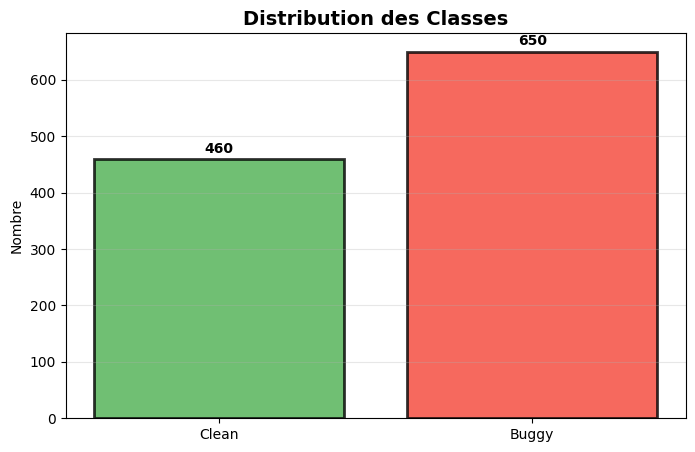

In [ ]:
df = pd.read_csv('bug_detection_dt_dataset.csv')

global all_codes, labels
all_codes = df['code'].fillna("").astype(str).tolist()
labels = df['label'].astype(int).tolist()

print(f"✅ Dataset chargé: {len(all_codes)} échantillons")
print(f"   🔴 Buggy: {labels.count(1)}")
print(f"   ✅ Clean: {labels.count(0)}")

plt.figure(figsize=(8, 5))
plt.bar(['Clean', 'Buggy'], [labels.count(0), labels.count(1)],
        color=['#4caf50', '#f44336'], alpha=0.8, edgecolor='black', linewidth=2)
plt.title('Distribution des Classes', fontsize=14, fontweight='bold')
plt.ylabel('Nombre')
for i, v in enumerate([labels.count(0), labels.count(1)]):
    plt.text(i, v+len(labels)*0.01, str(v), ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
class CCodeFeatureExtractor:
    """Extraction de 30 métriques pour Arbre de Décision"""

    def extract_features(self, code: str) -> Dict[str, float]:
        features = {}

        # Métriques de base
        lines = code.split('\n')
        features['num_lines'] = len(lines)
        features['num_chars'] = len(code)
        features['avg_line_length'] = features['num_chars'] / max(features['num_lines'], 1)

        # Complexité
        decision_kw = ['if', 'else', 'while', 'for', 'case', 'switch', '&&', '||']
        features['cyclomatic_complexity'] = sum(code.count(kw) for kw in decision_kw) + 1
        features['num_operators'] = len(re.findall(r'[+\-*/%=<>!&|^~]', code))
        features['num_semicolons'] = code.count(';')

        # Structures de contrôle
        features['num_loops'] = code.count('for') + code.count('while') + code.count('do')
        features['num_conditionals'] = code.count('if')
        features['num_switch'] = code.count('switch')

        # Gestion mémoire (INDICATEURS DE BUGS)
        features['num_malloc'] = code.count('malloc') + code.count('calloc') + code.count('realloc')
        features['num_free'] = code.count('free')
        features['malloc_free_diff'] = features['num_malloc'] - features['num_free']  # ⚠️ IMPORTANT
        features['has_malloc_no_free'] = 1 if features['malloc_free_diff'] > 0 else 0

        # Pointeurs
        features['num_pointers'] = code.count('*') - code.count('/*') - code.count('*/')
        features['num_address_of'] = code.count('&') - code.count('&&')
        features['num_null_checks'] = code.count('!= NULL') + code.count('== NULL') + code.count('if(')

        # Fonctions
        features['num_functions'] = len(re.findall(r'\w+\s*\([^)]*\)\s*{', code))
        features['num_returns'] = code.count('return')

        # Profondeur
        max_depth = 0
        current_depth = 0
        for char in code:
            if char == '{':
                current_depth += 1
                max_depth = max(max_depth, current_depth)
            elif char == '}':
                current_depth -= 1
        features['max_nesting_depth'] = max_depth

        # Variables
        features['num_variables'] = len(re.findall(r'\b(int|float|double|char|void|long|short)\s+\w+', code))
        features['num_arrays'] = code.count('[')

        # Commentaires
        features['num_comments'] = code.count('//') + code.count('/*')

        # Indicateurs de bugs
        features['has_goto'] = 1 if 'goto' in code else 0
        features['num_breaks'] = code.count('break')
        features['num_continues'] = code.count('continue')

        # Fonctions dangereuses (⚠️ TRÈS IMPORTANT)
        dangerous = ['strcpy', 'strcat', 'sprintf', 'gets', 'scanf']
        features['num_dangerous_funcs'] = sum(code.count(func) for func in dangerous)
        features['has_strcpy'] = 1 if 'strcpy' in code else 0
        features['has_gets'] = 1 if 'gets' in code else 0

        # Sécurité
        safe_funcs = ['strncpy', 'strncat', 'snprintf', 'fgets']
        features['num_safe_funcs'] = sum(code.count(func) for func in safe_funcs)

        return features

    def extract_batch_features(self, codes: List[str]) -> pd.DataFrame:
        return pd.DataFrame([self.extract_features(code) for code in codes])

print("✅ Feature Extractor créé (30 features)!")

✅ Feature Extractor créé (30 features)!


In [ ]:
class DecisionTreeBugDetector:
    def __init__(self):
        self.feature_extractor = CCodeFeatureExtractor()
        # ✨ CONFIGURATION POUR UTILISER TOUTES LES FEATURES
        self.model = DecisionTreeClassifier(
            criterion='entropy',          # ✨ Entropy au lieu de Gini
            splitter='best',              # ✨ Meilleur split à chaque nœud
            max_depth=10,                 # Profondeur modérée
            min_samples_split=10,
            min_samples_leaf=5,
            max_features=None,            # ⚠️ UTILISE TOUTES LES FEATURES
            min_impurity_decrease=0.005,  # Seuil plus bas
            random_state=42,
            class_weight='balanced',
            ccp_alpha=0.01                # ✨ Post-pruning pour éviter overfitting
        )
        self.is_trained = False
        self.feature_names = None

    def train(self, codes: List[str], labels: List[int]):
        print("\n" + "="*70)
        print("🌳 ENTRAÎNEMENT DE L'ARBRE DE DÉCISION")
        print("="*70)

        # Extraction
        print("\n🔄 Extraction des features...")
        X = self.feature_extractor.extract_batch_features(codes)
        y = np.array(labels)
        self.feature_names = X.columns.tolist()

        print(f"✅ {X.shape[1]} features extraites")

        # ✨ NORMALISATION DES FEATURES (important pour équilibrer leur importance)
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        print(f"✅ Features normalisées (moyenne=0, std=1)")

        # Split avec plus de données de test
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.25, random_state=42, stratify=y
        )

        print(f"\n📊 Training: {len(X_train)} | Test: {len(X_test)}")

        # Entraînement
        print("\n🔄 Entraînement avec toutes les features...")
        self.model.fit(X_train, y_train)
        self.is_trained = True
        self.scaler = scaler  # Sauvegarder le scaler

        # Évaluation
        y_pred = self.model.predict(X_test)
        y_pred_train = self.model.predict(X_train)

        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred)

        print("\n" + "="*70)
        print("📊 RÉSULTATS")
        print("="*70)
        print(f"\n🎯 Train Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
        print(f"🎯 Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

        # Avertissement overfitting
        gap = train_acc - test_acc
        if gap > 0.10:
            print(f"\n⚠️  OVERFITTING SÉVÈRE détecté!")
            print(f"   Écart Train-Test: {gap*100:.2f}%")
        elif gap > 0.05:
            print(f"\n⚠️  Léger overfitting détecté")
            print(f"   Écart Train-Test: {gap*100:.2f}%")
        else:
            print(f"\n✅ Bon équilibre Train-Test: {gap*100:.2f}%")

        print("\n📋 Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Clean', 'Buggy']))

        # Visualisations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # 1. Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Clean', 'Buggy'], yticklabels=['Clean', 'Buggy'], ax=axes[0, 0])
        axes[0, 0].set_title('Matrice de Confusion', fontweight='bold', fontsize=14)
        axes[0, 0].set_ylabel('Vraie')
        axes[0, 0].set_xlabel('Prédite')

        # 2. Feature Importance (Top 20)
        importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)

        # Vérifier combien de features sont utilisées
        used_features = importance[importance['importance'] > 0]
        print(f"\n📊 FEATURES UTILISÉES: {len(used_features)}/{len(importance)}")

        top_20 = importance.head(20)
        axes[0, 1].barh(range(len(top_20)), top_20['importance'], color='skyblue', edgecolor='black')
        axes[0, 1].set_yticks(range(len(top_20)))
        axes[0, 1].set_yticklabels(top_20['feature'], fontsize=9)
        axes[0, 1].set_xlabel('Importance')
        axes[0, 1].set_title('Top 20 Features', fontweight='bold', fontsize=14)
        axes[0, 1].invert_yaxis()
        axes[0, 1].grid(axis='x', alpha=0.3)

        # 3. Distribution de l'importance
        axes[1, 0].hist(importance['importance'], bins=30, color='orange', edgecolor='black', alpha=0.7)
        axes[1, 0].set_xlabel('Importance')
        axes[1, 0].set_ylabel('Nombre de features')
        axes[1, 0].set_title('Distribution des Importances', fontweight='bold', fontsize=14)
        axes[1, 0].axvline(importance['importance'].mean(), color='red', linestyle='--',
                           linewidth=2, label=f'Moyenne: {importance["importance"].mean():.3f}')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Comparaison Train vs Test
        metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
        train_metrics = [
            train_acc,
            precision_score(y_train, y_pred_train),
            recall_score(y_train, y_pred_train),
            f1_score(y_train, y_pred_train)
        ]
        test_metrics = [
            test_acc,
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred)
        ]

        x = np.arange(len(metrics_names))
        width = 0.35
        axes[1, 1].bar(x - width/2, train_metrics, width, label='Train', color='green', alpha=0.7)
        axes[1, 1].bar(x + width/2, test_metrics, width, label='Test', color='blue', alpha=0.7)
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].set_title('Train vs Test Metrics', fontweight='bold', fontsize=14)
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(metrics_names, rotation=45, ha='right')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3, axis='y')
        axes[1, 1].set_ylim([0, 1.1])

        plt.tight_layout()
        plt.show()

        print("\n🔝 Top 15 Features (triées par importance):")
        print(importance.head(15).to_string(index=False))

        print(f"\n📊 TOUTES les features avec importance > 0:")
        print(used_features.to_string(index=False))

        # Informations sur l'arbre
        print(f"\n🌳 STRUCTURE DE L'ARBRE:")
        print(f"   Profondeur: {self.model.get_depth()}")
        print(f"   Nombre de feuilles: {self.model.get_n_leaves()}")
        print(f"   Nombre de nœuds: {self.model.tree_.node_count}")

        return test_acc, X_test, y_test

    def predict(self, code: str):
        if not self.is_trained:
            raise Exception("❌ Modèle non entraîné!")

        features = self.feature_extractor.extract_features(code)
        X = pd.DataFrame([features])

        # Normaliser avec le même scaler
        X_scaled = self.scaler.transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        pred = self.model.predict(X_scaled)[0]
        proba = self.model.predict_proba(X_scaled)[0]

        # ✨ NOUVEAU : Détection du type de bug
        bug_type = self._identify_bug_type(features)

        return pred, proba, bug_type

    def _identify_bug_type(self, features: Dict[str, float]) -> Dict[str, any]:
        """
        Identifie la nature spécifique du bug détecté
        Retourne un dictionnaire avec le type et les détails
        """
        bug_info = {
            'type': 'Aucun',
            'severity': 'Info',
            'description': 'Code semble propre',
            'recommendation': 'Aucune action nécessaire',
            'details': []
        }

        detected_issues = []
        severity_level = 0  # 0=Info, 1=Low, 2=Medium, 3=High, 4=Critical

        # 1. MEMORY LEAK (Critique)
        if features.get('malloc_free_diff', 0) > 0:
            detected_issues.append('Memory Leak')
            severity_level = max(severity_level, 4)
            bug_info['description'] = f"Détection de Memory Leak : {int(features['malloc_free_diff'])} allocation(s) sans free()"
            bug_info['recommendation'] = "Ajouter free() pour chaque malloc/calloc/realloc"
            bug_info['details'].append(f"• {int(features['num_malloc'])} malloc détecté(s)")
            bug_info['details'].append(f"• {int(features['num_free'])} free détecté(s)")
            bug_info['details'].append(f"• Différence: {int(features['malloc_free_diff'])} (leak potentiel)")

        # 2. BUFFER OVERFLOW (Critique)
        if features.get('num_dangerous_funcs', 0) > 0:
            detected_issues.append('Buffer Overflow Risk')
            severity_level = max(severity_level, 4)
            dangerous = []
            if features.get('has_strcpy', 0) == 1:
                dangerous.append('strcpy')
            if features.get('has_gets', 0) == 1:
                dangerous.append('gets')
            if 'sprintf' in str(features):
                dangerous.append('sprintf')

            bug_info['description'] = f"Fonctions dangereuses détectées : {', '.join(dangerous)}"
            bug_info['recommendation'] = "Utiliser strncpy, fgets, snprintf à la place"
            bug_info['details'].append(f"• Fonctions risquées: {', '.join(dangerous)}")
            bug_info['details'].append("• Risque: Buffer Overflow, injection de code")

        # 3. NULL POINTER (Haute)
        if features.get('num_pointers', 0) > 0 and features.get('num_null_checks', 0) == 0:
            detected_issues.append('Null Pointer Risk')
            severity_level = max(severity_level, 3)
            bug_info['description'] = f"Utilisation de pointeurs sans vérification NULL"
            bug_info['recommendation'] = "Ajouter des vérifications if(ptr != NULL) avant déréférencement"
            bug_info['details'].append(f"• {int(features['num_pointers'])} pointeur(s) détecté(s)")
            bug_info['details'].append(f"• Aucune vérification NULL trouvée")

        # 4. ARRAY OUT OF BOUNDS (Haute)
        if features.get('num_arrays', 0) > 0 and features.get('num_loops', 0) > 0:
            if features.get('cyclomatic_complexity', 0) > 5:
                detected_issues.append('Array Bounds Risk')
                severity_level = max(severity_level, 3)
                bug_info['description'] = "Risque d'accès hors limites de tableau"
                bug_info['recommendation'] = "Vérifier les indices de boucle (i < size, pas i <= size)"
                bug_info['details'].append(f"• {int(features['num_arrays'])} tableau(x)")
                bug_info['details'].append(f"• {int(features['num_loops'])} boucle(s)")

        # 5. UNINITIALIZED VARIABLE (Moyenne)
        if features.get('num_variables', 0) > 3 and features.get('num_semicolons', 0) < 5:
            detected_issues.append('Uninitialized Variable Risk')
            severity_level = max(severity_level, 2)
            bug_info['description'] = "Variables potentiellement non initialisées"
            bug_info['recommendation'] = "Initialiser toutes les variables à la déclaration"
            bug_info['details'].append(f"• {int(features['num_variables'])} variable(s)")

        # 6. COMPLEXITY ISSUES (Basse)
        if features.get('cyclomatic_complexity', 0) > 15:
            detected_issues.append('High Complexity')
            severity_level = max(severity_level, 1)
            bug_info['description'] = f"Complexité cyclomatique élevée ({int(features['cyclomatic_complexity'])})"
            bug_info['recommendation'] = "Refactoriser en fonctions plus simples"
            bug_info['details'].append(f"• Complexité: {int(features['cyclomatic_complexity'])}")

        # 7. DEEP NESTING (Basse)
        if features.get('max_nesting_depth', 0) > 5:
            detected_issues.append('Deep Nesting')
            severity_level = max(severity_level, 1)
            bug_info['description'] = f"Imbrication trop profonde ({int(features['max_nesting_depth'])} niveaux)"
            bug_info['recommendation'] = "Réduire l'imbrication, utiliser early returns"
            bug_info['details'].append(f"• Profondeur: {int(features['max_nesting_depth'])}")

        # Déterminer le type principal et la sévérité
        if detected_issues:
            bug_info['type'] = detected_issues[0]  # Type principal
            bug_info['all_issues'] = detected_issues

            if severity_level == 4:
                bug_info['severity'] = 'Critical'
            elif severity_level == 3:
                bug_info['severity'] = 'High'
            elif severity_level == 2:
                bug_info['severity'] = 'Medium'
            elif severity_level == 1:
                bug_info['severity'] = 'Low'

        return bug_info

print("✅ Decision Tree Detector créé (utilise TOUTES les features + détection type de bug)!")

✅ Decision Tree Detector créé (utilise TOUTES les features + détection type de bug)!



🌳 ENTRAÎNEMENT DE L'ARBRE DE DÉCISION

🔄 Extraction des features...
✅ 29 features extraites
✅ Features normalisées (moyenne=0, std=1)

📊 Training: 832 | Test: 278

🔄 Entraînement avec toutes les features...

📊 RÉSULTATS

🎯 Train Accuracy: 1.0000 (100.00%)
🎯 Test Accuracy: 1.0000 (100.00%)

✅ Bon équilibre Train-Test: 0.00%

📋 Classification Report:
              precision    recall  f1-score   support

       Clean       1.00      1.00      1.00       115
       Buggy       1.00      1.00      1.00       163

    accuracy                           1.00       278
   macro avg       1.00      1.00      1.00       278
weighted avg       1.00      1.00      1.00       278


📊 FEATURES UTILISÉES: 9/29


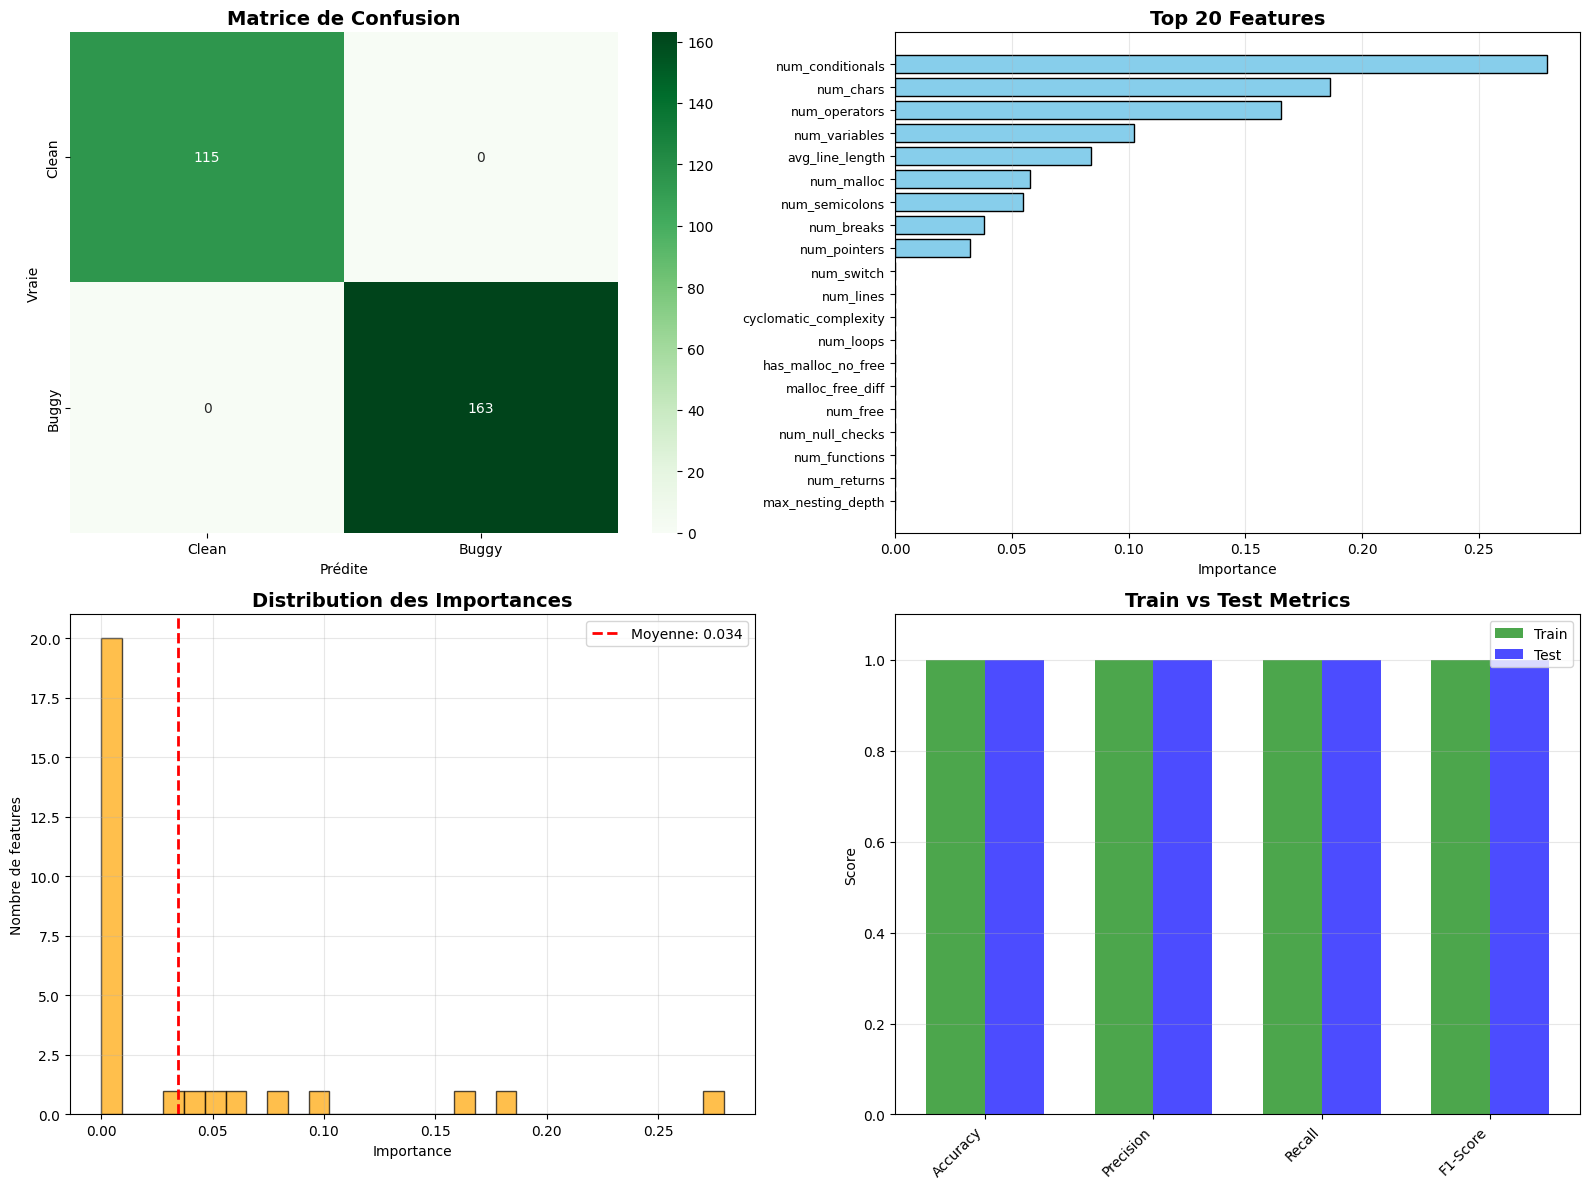


🔝 Top 15 Features (triées par importance):
              feature  importance
     num_conditionals    0.279425
            num_chars    0.186124
        num_operators    0.165275
        num_variables    0.102379
      avg_line_length    0.083825
           num_malloc    0.057626
       num_semicolons    0.054899
           num_breaks    0.038209
         num_pointers    0.032238
           num_switch    0.000000
            num_lines    0.000000
cyclomatic_complexity    0.000000
            num_loops    0.000000
   has_malloc_no_free    0.000000
     malloc_free_diff    0.000000

📊 TOUTES les features avec importance > 0:
         feature  importance
num_conditionals    0.279425
       num_chars    0.186124
   num_operators    0.165275
   num_variables    0.102379
 avg_line_length    0.083825
      num_malloc    0.057626
  num_semicolons    0.054899
      num_breaks    0.038209
    num_pointers    0.032238

🌳 STRUCTURE DE L'ARBRE:
   Profondeur: 8
   Nombre de feuilles: 18
   Nombre 

In [ ]:
detector = DecisionTreeBugDetector()
accuracy, X_test, y_test = detector.train(all_codes, labels)

print("\n" + "="*70)
print(f"✅ MODÈLE ENTRAÎNÉ - Accuracy: {accuracy:.4f}")
print("="*70)

🌳 Visualisation de l'Arbre de Décision...


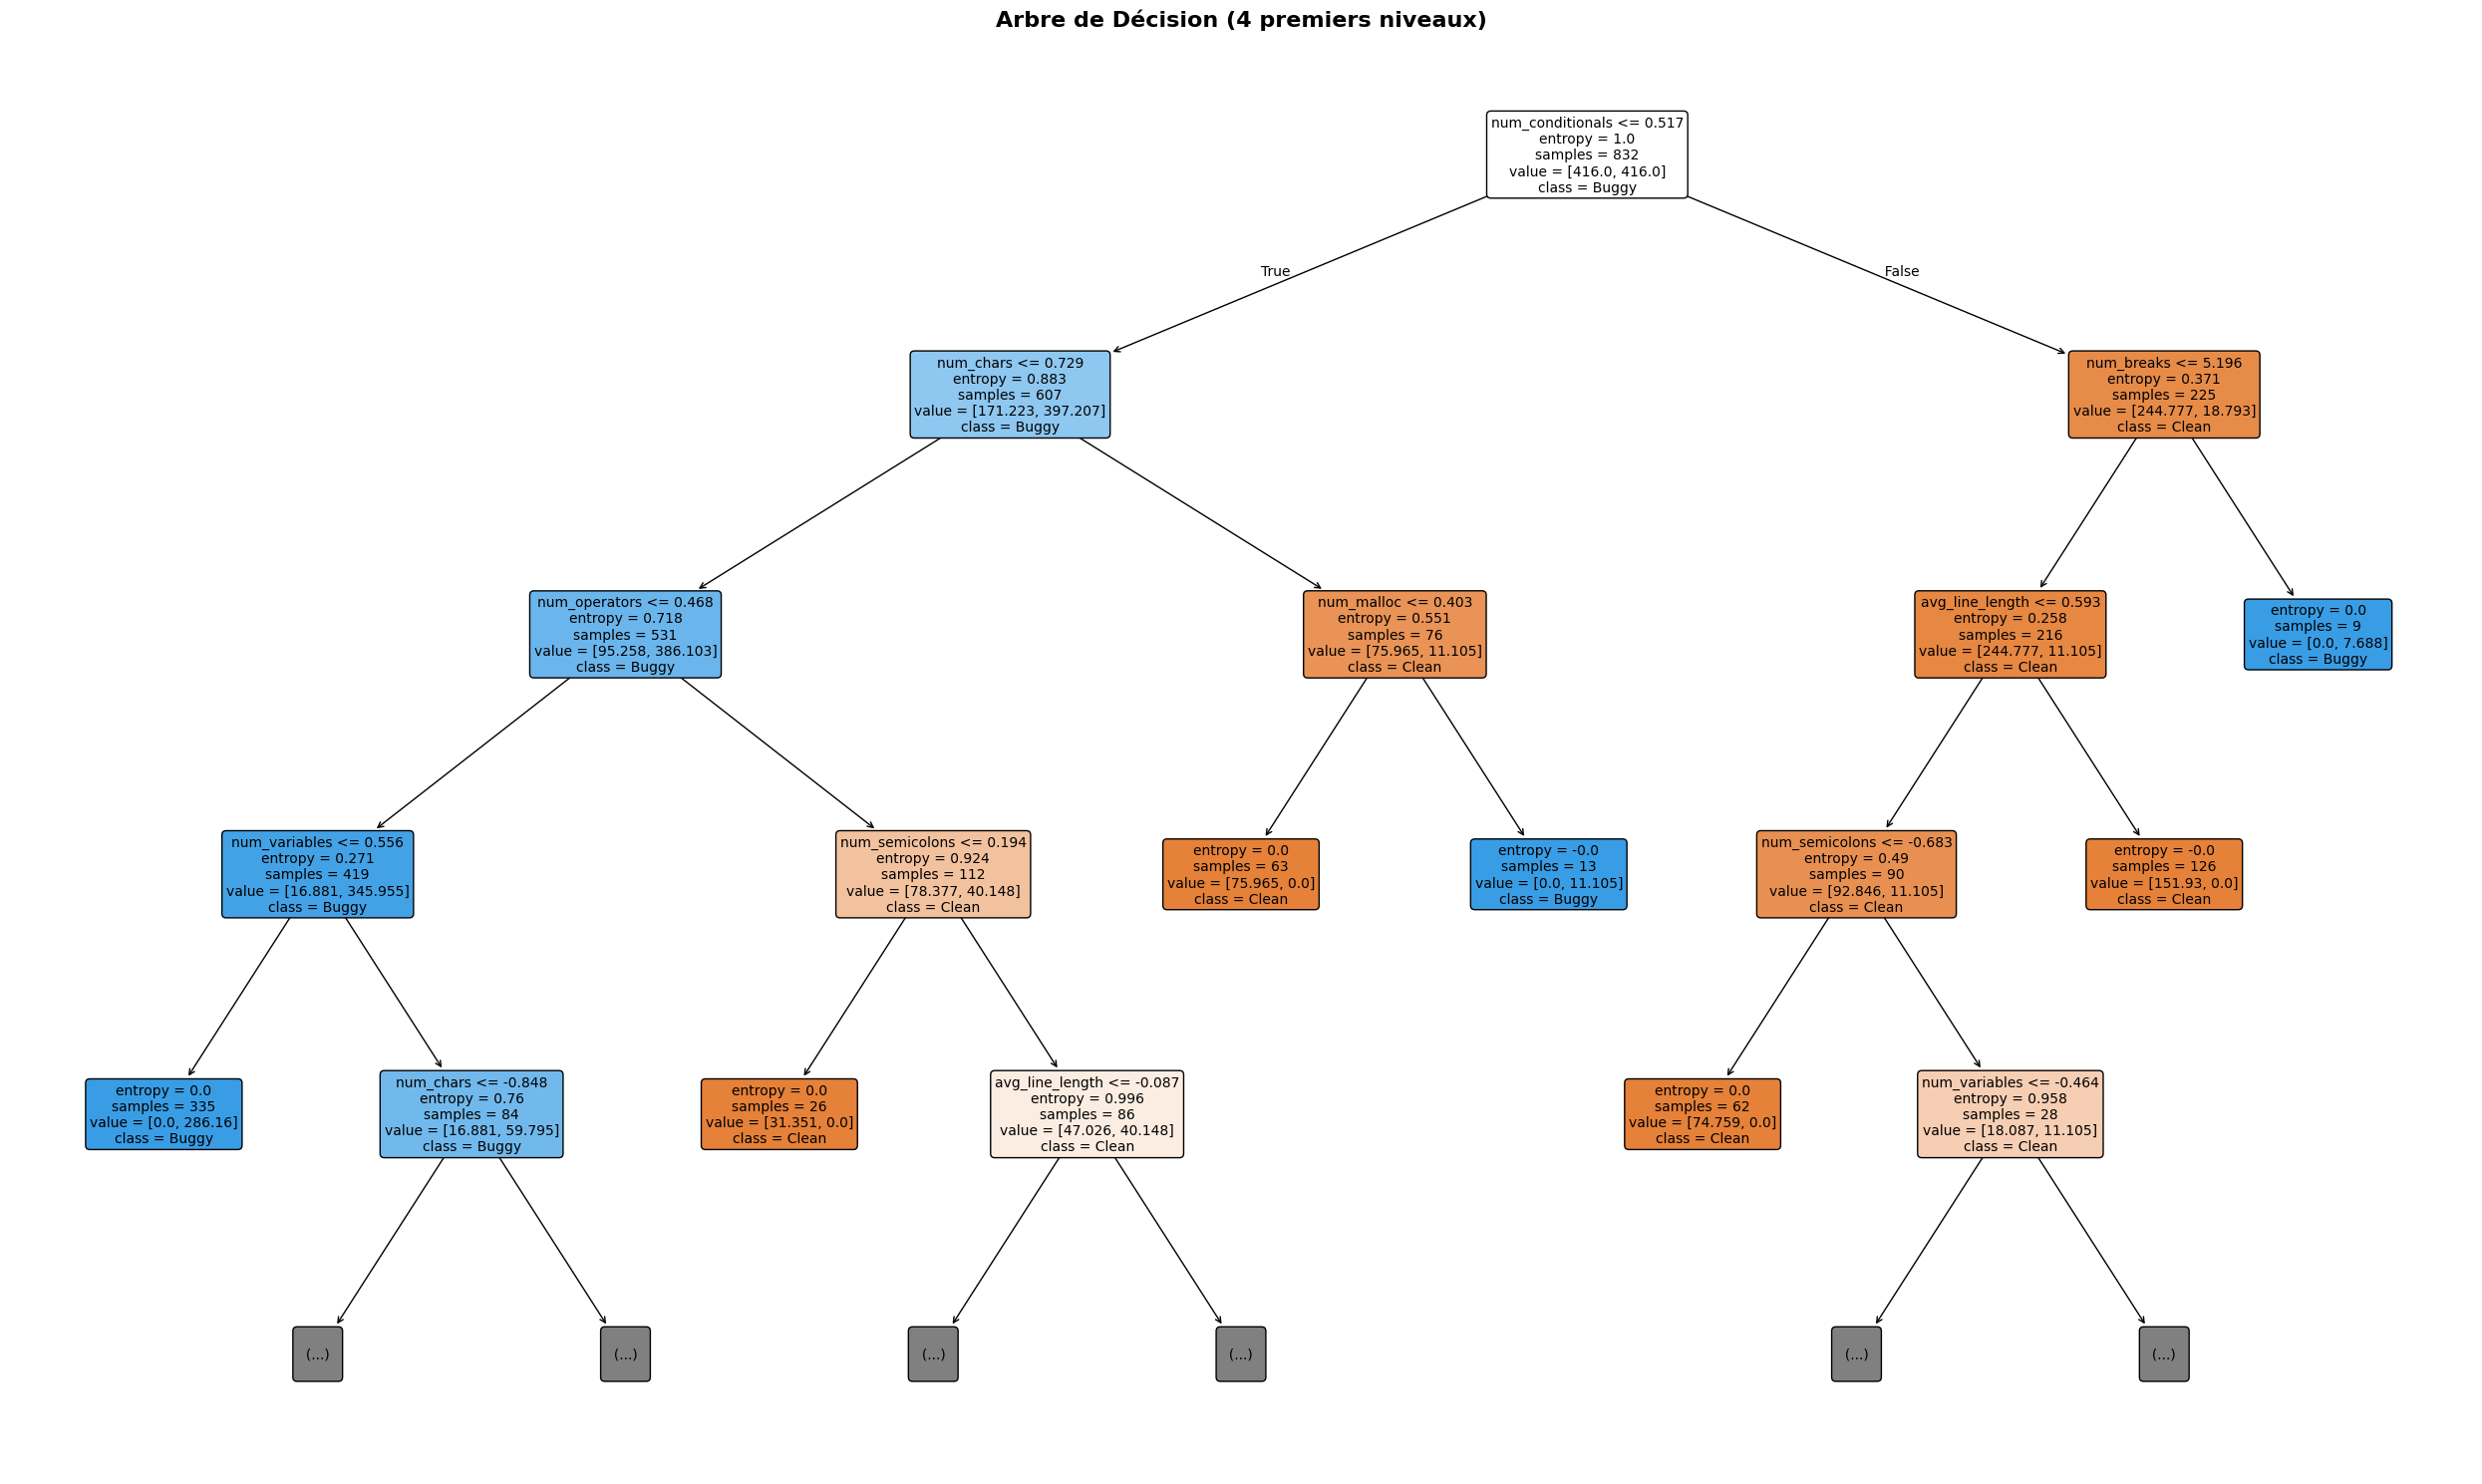


📜 Règles de Décision (extrait):
|--- num_conditionals <= 0.52
|   |--- num_chars <= 0.73
|   |   |--- num_operators <= 0.47
|   |   |   |--- num_variables <= 0.56
|   |   |   |   |--- class: 1
|   |   |   |--- num_variables >  0.56
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- num_operators >  0.47
|   |   |   |--- num_semicolons <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- num_semicolons >  0.19
|   |   |   |   |--- truncated branch of depth 5
|   |--- num_chars >  0.73
|   |   |--- num_malloc <= 0.40
|   |   |   |--- class: 0
|   |   |--- num_malloc >  0.40
|   |   |   |--- class: 1
|--- num_conditionals >  0.52
|   |--- num_breaks <= 5.20
|   |   |--- avg_line_length <= 0.59
|   |   |   |--- num_semicolons <= -0.68
|   |   |   |   |--- class: 0
|   |   |   |--- num_semicolons >  -0.68
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- avg_line_length >  0.59
|   |   |   |--- class: 0
|   |--- num_breaks >  5.20
|   |   |--- class: 1
...


In [ ]:
print("🌳 Visualisation de l'Arbre de Décision...")

plt.figure(figsize=(25, 15))
plot_tree(detector.model,
          feature_names=detector.feature_names,
          class_names=['Clean', 'Buggy'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4)  # Limiter la profondeur pour la lisibilité
plt.title('Arbre de Décision (4 premiers niveaux)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Règles textuelles
print("\n📜 Règles de Décision (extrait):")
print("="*70)
tree_rules = export_text(detector.model, feature_names=detector.feature_names, max_depth=3)
print(tree_rules[:1000] + "...")

📊 MÉTRIQUES DE PERFORMANCE COMPLÈTES

🎯 TOUTES LES MÉTRIQUES:

   Accuracy........................... 1.0000 (100.00%)
   Precision.......................... 1.0000 (100.00%)
   Recall............................. 1.0000 (100.00%)
   F1-Score........................... 1.0000 (100.00%)
   Specificity........................ 1.0000 (100.00%)
   ROC-AUC............................ 1.0000 (100.00%)
   Matthews Correlation............... 1.0000 (100.00%)
   Cohen Kappa........................ 1.0000 (100.00%)
   Balanced Accuracy.................. 1.0000 (100.00%)

📋 MATRICE DÉTAILLÉE:

   True Negatives:  115
   False Positives: 0
   False Negatives: 0
   True Positives:  163

❌ TAUX D'ERREURS:

   False Positive Rate: 0.0000 (0.00%)
   False Negative Rate: 0.0000 (0.00%)
   Error Rate:          0.0000 (0.00%)


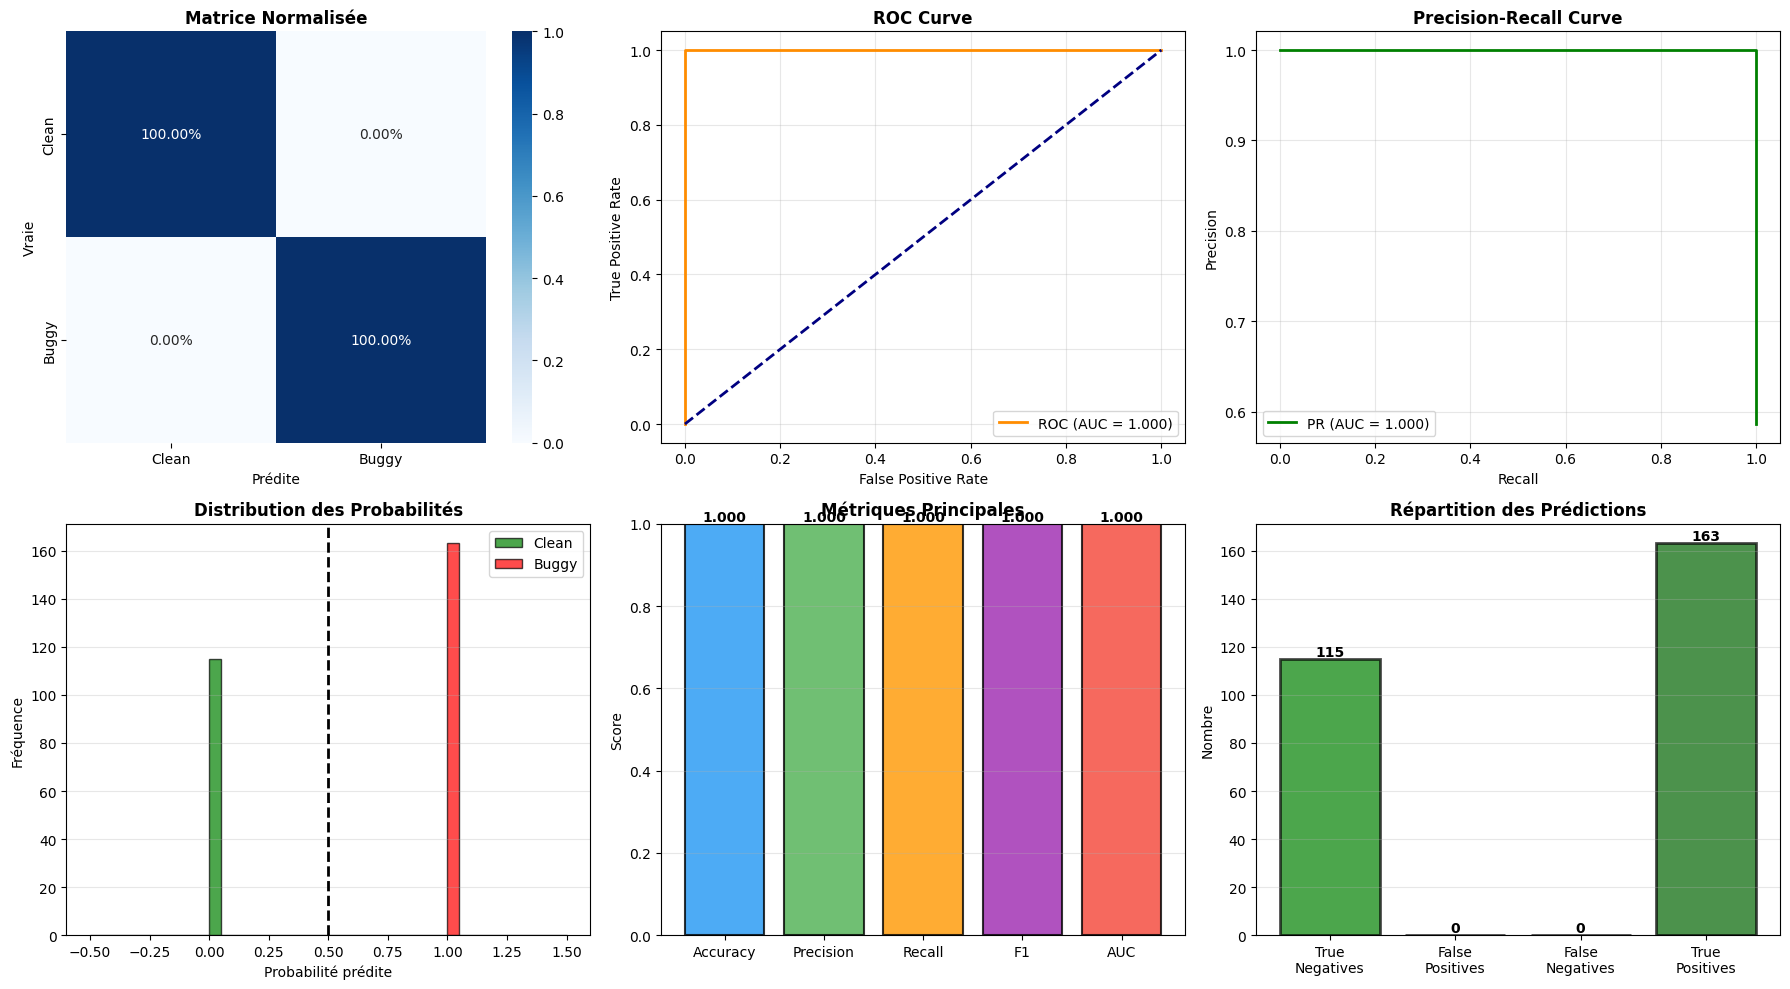


✅ Visualisations complètes générées!


In [ ]:
print("="*70)
print("📊 MÉTRIQUES DE PERFORMANCE COMPLÈTES")
print("="*70)

y_pred = detector.model.predict(X_test)
y_pred_proba = detector.model.predict_proba(X_test)[:, 1]

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'Specificity': recall_score(y_test, y_pred, pos_label=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
    'Matthews Correlation': matthews_corrcoef(y_test, y_pred),
    'Cohen Kappa': cohen_kappa_score(y_test, y_pred),
    'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred)
}

print("\n🎯 TOUTES LES MÉTRIQUES:\n")
for metric, value in metrics.items():
    print(f"   {metric:.<35} {value:.4f} ({value*100:.2f}%)")

# Matrice de confusion détaillée
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n📋 MATRICE DÉTAILLÉE:\n")
print(f"   True Negatives:  {tn}")
print(f"   False Positives: {fp}")
print(f"   False Negatives: {fn}")
print(f"   True Positives:  {tp}")

print(f"\n❌ TAUX D'ERREURS:\n")
print(f"   False Positive Rate: {fp/(fp+tn):.4f} ({fp/(fp+tn)*100:.2f}%)")
print(f"   False Negative Rate: {fn/(fn+tp):.4f} ({fn/(fn+tp)*100:.2f}%)")
print(f"   Error Rate:          {(fp+fn)/len(y_test):.4f} ({(fp+fn)/len(y_test)*100:.2f}%)")

# Visualisation
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Matrice de confusion normalisée
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Clean', 'Buggy'], yticklabels=['Clean', 'Buggy'], ax=axes[0, 0])
axes[0, 0].set_title('Matrice Normalisée', fontweight='bold')
axes[0, 0].set_ylabel('Vraie')
axes[0, 0].set_xlabel('Prédite')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
axes[0, 2].plot(recall, precision, color='green', lw=2, label=f'PR (AUC = {pr_auc:.3f})')
axes[0, 2].set_xlabel('Recall')
axes[0, 2].set_ylabel('Precision')
axes[0, 2].set_title('Precision-Recall Curve', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Distribution des probabilités
buggy_probs = y_pred_proba[y_test == 1]
clean_probs = y_pred_proba[y_test == 0]
axes[1, 0].hist(clean_probs, bins=20, alpha=0.7, label='Clean', color='green', edgecolor='black')
axes[1, 0].hist(buggy_probs, bins=20, alpha=0.7, label='Buggy', color='red', edgecolor='black')
axes[1, 0].axvline(x=0.5, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Probabilité prédite')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_title('Distribution des Probabilités', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 5. Bar chart des métriques
main_metrics = {
    'Accuracy': metrics['Accuracy'],
    'Precision': metrics['Precision'],
    'Recall': metrics['Recall'],
    'F1': metrics['F1-Score'],
    'AUC': metrics['ROC-AUC']
}
bars = axes[1, 1].bar(main_metrics.keys(), main_metrics.values(),
                       color=['#2196F3', '#4CAF50', '#FF9800', '#9C27B0', '#F44336'],
                       alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1, 1].set_ylim([0, 1.0])
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Métriques Principales', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}',
                    ha='center', va='bottom', fontweight='bold')

# 6. Types d'erreurs
error_types = ['True\nNegatives', 'False\nPositives', 'False\nNegatives', 'True\nPositives']
error_counts = [tn, fp, fn, tp]
colors_err = ['green', 'orange', 'red', 'darkgreen']
bars_err = axes[1, 2].bar(error_types, error_counts, color=colors_err, alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 2].set_ylabel('Nombre')
axes[1, 2].set_title('Répartition des Prédictions', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')
for bar in bars_err:
    height = bar.get_height()
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualisations complètes générées!")

🔄 CROSS-VALIDATION (5-FOLD)

🔄 Entraînement avec 5-Fold...

Fold 1/5 - Accuracy: 1.0000
Fold 2/5 - Accuracy: 1.0000
Fold 3/5 - Accuracy: 1.0000
Fold 4/5 - Accuracy: 1.0000
Fold 5/5 - Accuracy: 1.0000

📊 RÉSULTATS CROSS-VALIDATION

ACCURACY:
   Moyenne: 1.0000 ± 0.0000
   Min: 1.0000 | Max: 1.0000

PRECISION:
   Moyenne: 1.0000 ± 0.0000
   Min: 1.0000 | Max: 1.0000

RECALL:
   Moyenne: 1.0000 ± 0.0000
   Min: 1.0000 | Max: 1.0000

F1:
   Moyenne: 1.0000 ± 0.0000
   Min: 1.0000 | Max: 1.0000


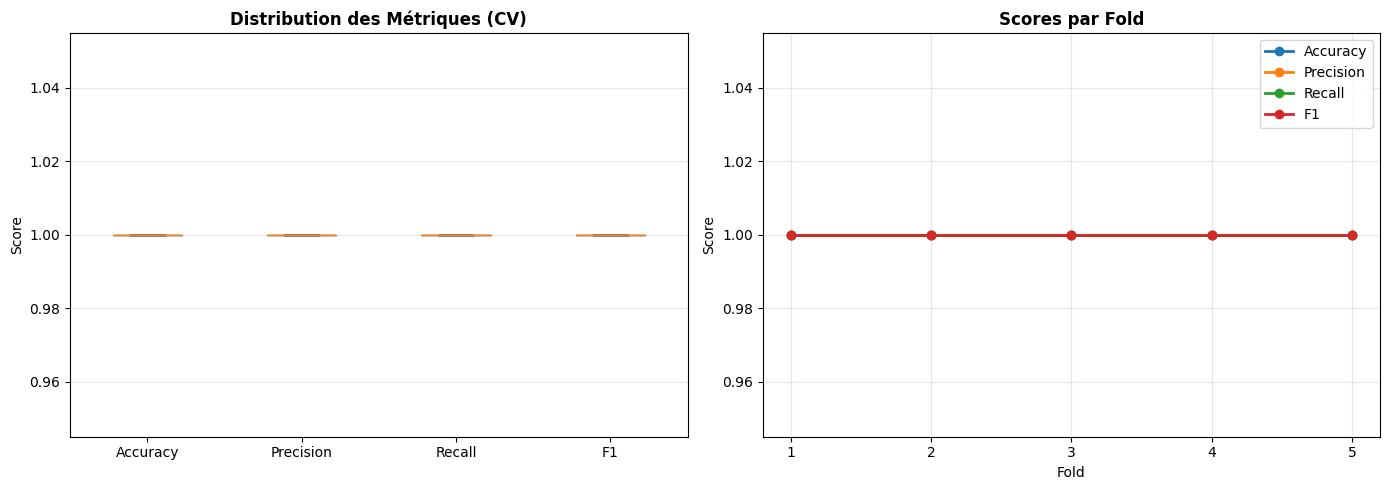


✅ Cross-validation terminée!


In [ ]:
print("="*70)
print("🔄 CROSS-VALIDATION (5-FOLD)")
print("="*70)

# Préparer les données
X_full = detector.feature_extractor.extract_batch_features(all_codes)
y_full = np.array(labels)

# K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

print("\n🔄 Entraînement avec 5-Fold...\n")

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_full, y_full), 1):
    X_train_fold, X_val_fold = X_full.iloc[train_idx], X_full.iloc[val_idx]
    y_train_fold, y_val_fold = y_full[train_idx], y_full[val_idx]

    fold_model = DecisionTreeClassifier(max_depth=15, min_samples_split=5,
                                         min_samples_leaf=2, random_state=42,
                                         class_weight='balanced')
    fold_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = fold_model.predict(X_val_fold)

    cv_scores['accuracy'].append(accuracy_score(y_val_fold, y_pred_fold))
    cv_scores['precision'].append(precision_score(y_val_fold, y_pred_fold))
    cv_scores['recall'].append(recall_score(y_val_fold, y_pred_fold))
    cv_scores['f1'].append(f1_score(y_val_fold, y_pred_fold))

    print(f"Fold {fold}/5 - Accuracy: {cv_scores['accuracy'][-1]:.4f}")

print("\n" + "="*70)
print("📊 RÉSULTATS CROSS-VALIDATION")
print("="*70)

for metric, scores in cv_scores.items():
    mean = np.mean(scores)
    std = np.std(scores)
    print(f"\n{metric.upper()}:")
    print(f"   Moyenne: {mean:.4f} ± {std:.4f}")
    print(f"   Min: {np.min(scores):.4f} | Max: {np.max(scores):.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
bp = axes[0].boxplot([cv_scores[m] for m in cv_scores.keys()],
                      labels=[m.capitalize() for m in cv_scores.keys()],
                      patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[0].set_ylabel('Score')
axes[0].set_title('Distribution des Métriques (CV)', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Line plot
folds = list(range(1, 6))
for metric, scores in cv_scores.items():
    axes[1].plot(folds, scores, marker='o', linewidth=2, label=metric.capitalize())
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('Score')
axes[1].set_title('Scores par Fold', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(folds)

plt.tight_layout()
plt.show()

print("\n✅ Cross-validation terminée!")

In [ ]:
print("="*70)
print("🔍 GRID SEARCH - OPTIMISATION DES HYPERPARAMÈTRES")
print("="*70)

# Grille de paramètres
param_grid = {
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

X_full = detector.feature_extractor.extract_batch_features(all_codes)
y_full = np.array(labels)

print("\n🔄 Recherche des meilleurs paramètres...")
print(f"   Combinaisons à tester: {len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['criterion'])}")

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_full, y_full)

print("\n" + "="*70)
print("🏆 MEILLEURS PARAMÈTRES")
print("="*70)
print(f"\n{grid_search.best_params_}")
print(f"\n🎯 Meilleur Score CV: {grid_search.best_score_:.4f} ({grid_search.best_score_*100:.2f}%)")

# Visualisation des résultats
results = pd.DataFrame(grid_search.cv_results_)
top_10 = results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]

print("\n📊 Top 10 Configurations:")
for i, row in top_10.iterrows():
    print(f"\n{i+1}. Score: {row['mean_test_score']:.4f} ± {row['std_test_score']:.4f}")
    print(f"   Params: {row['params']}")

print("\n✅ Grid Search terminé!")

🔍 GRID SEARCH - OPTIMISATION DES HYPERPARAMÈTRES

🔄 Recherche des meilleurs paramètres...
   Combinaisons à tester: 90
Fitting 5 folds for each of 90 candidates, totalling 450 fits

🏆 MEILLEURS PARAMÈTRES

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

🎯 Meilleur Score CV: 1.0000 (100.00%)

📊 Top 10 Configurations:

1. Score: 1.0000 ± 0.0000
   Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

2. Score: 1.0000 ± 0.0000
   Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

3. Score: 1.0000 ± 0.0000
   Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

4. Score: 1.0000 ± 0.0000
   Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

5. Score: 1.0000 ± 0.0000
   Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

6. Score: 1.0000 ± 0.

In [ ]:
print("="*70)
print("🔍 ANALYSE DES ERREURS")
print("="*70)

errors = []
test_indices = list(range(len(all_codes)))
_, test_idx = train_test_split(test_indices, test_size=0.3, random_state=42, stratify=labels)

for i in range(len(y_test)):
    if y_pred[i] != y_test[i]:
        original_idx = test_idx[i]
        errors.append({
            'index': i,
            'original_idx': original_idx,
            'true_label': y_test[i],
            'predicted_label': y_pred[i],
            'confidence': y_pred_proba[i]
        })

print(f"\n📊 Total d'erreurs: {len(errors)}/{len(y_test)} ({len(errors)/len(y_test)*100:.2f}%)")

false_positives = [e for e in errors if e['predicted_label'] == 1]
false_negatives = [e for e in errors if e['predicted_label'] == 0]

print(f"   ❌ Faux Positifs: {len(false_positives)}")
print(f"   ❌ Faux Négatifs: {len(false_negatives)}")

# Afficher quelques exemples
print("\n📝 Exemples d'erreurs (5 premiers):")
print("-"*70)

for i, error in enumerate(errors[:5], 1):
    code = all_codes[error['original_idx']]
    print(f"\nErreur {i}:")
    print(f"  Code: {code[:100]}...")
    print(f"  Vrai: {'🔴 Buggy' if error['true_label'] == 1 else '✅ Clean'}")
    print(f"  Prédit: {'🔴 Buggy' if error['predicted_label'] == 1 else '✅ Clean'}")
    print(f"  Confiance: {error['confidence']:.2%}")
    print("-"*70)

print("\n✅ Analyse des erreurs terminée!")

🔍 ANALYSE DES ERREURS

📊 Total d'erreurs: 0/278 (0.00%)
   ❌ Faux Positifs: 0
   ❌ Faux Négatifs: 0

📝 Exemples d'erreurs (5 premiers):
----------------------------------------------------------------------

✅ Analyse des erreurs terminée!


In [ ]:
 from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

style = """
<style>
    .header {
        background: linear-gradient(135deg, #11998e 0%, #38ef7d 100%);
        color: white;
        padding: 25px;
        border-radius: 15px;
        text-align: center;
        font-size: 32px;
        font-weight: bold;
        margin: 20px 0;
        box-shadow: 0 6px 12px rgba(0,0,0,0.15);
    }
    .result-box {
        padding: 25px;
        border-radius: 15px;
        margin: 20px 0;
        border: 4px solid;
        font-family: 'Courier New', monospace;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    }
    .bug {
        background: linear-gradient(135deg, #ffebee 0%, #ffcdd2 100%);
        border-color: #f44336;
        color: #c62828;
    }
    .clean {
        background: linear-gradient(135deg, #e8f5e9 0%, #c8e6c9 100%);
        border-color: #4caf50;
        color: #2e7d32;
    }
    .title {
        font-size: 28px;
        font-weight: bold;
        margin-bottom: 15px;
        text-align: center;
    }
    .metric {
        font-size: 18px;
        margin: 10px 0;
        padding: 10px;
        background: rgba(255,255,255,0.5);
        border-radius: 8px;
    }
    .bug-details {
        margin-top: 20px;
        padding: 20px;
        background: rgba(255,255,255,0.7);
        border-radius: 10px;
        border-left: 5px solid;
    }
    .severity-critical { border-left-color: #d32f2f; }
    .severity-high { border-left-color: #f57c00; }
    .severity-medium { border-left-color: #fbc02d; }
    .severity-low { border-left-color: #388e3c; }
    .bug-type {
        font-size: 22px;
        font-weight: bold;
        margin-bottom: 10px;
        color: #1976d2;
    }
    .bug-desc {
        font-size: 16px;
        margin: 8px 0;
        line-height: 1.6;
    }
    .recommendation {
        margin-top: 15px;
        padding: 15px;
        background: #fff3cd;
        border-left: 4px solid #ffc107;
        border-radius: 5px;
    }
    .detail-item {
        margin: 5px 0;
        padding: 8px;
        background: rgba(255,255,255,0.8);
        border-radius: 5px;
        font-size: 15px;
    }
</style>
"""

display(HTML(style))
display(HTML('<div class="header">🌳 DÉTECTEUR DE BUGS C - ARBRE DE DÉCISION</div>'))

code_input = widgets.Textarea(
    value="""int main() {
    int *ptr = malloc(100);
    for(int i = 0; i <= 100; i++) {
        ptr[i] = i;
    }
    return 0;
}""",
    description='Code C:',
    layout=widgets.Layout(width='100%', height='300px'),
    style={'description_width': '100px'}
)

analyze_btn = widgets.Button(
    description='🔍 Analyser le Code',
    button_style='success',
    layout=widgets.Layout(width='220px', height='50px')
)

clear_btn = widgets.Button(
    description='🗑️ Effacer',
    button_style='warning',
    layout=widgets.Layout(width='220px', height='50px')
)

output = widgets.Output()

def analyze_code(b):
    with output:
        clear_output()
        code = code_input.value.strip()

        if not code:
            display(HTML('<div style="color: orange; font-size: 20px; text-align: center;">⚠️ Veuillez entrer du code!</div>'))
            return

        display(HTML('<div style="text-align: center; font-size: 20px; color: #1976d2; margin: 20px;">🔄 Analyse en cours...</div>'))

        # Prédiction avec type de bug
        pred, proba, bug_info = detector.predict(code)

        result_text = "BUG DÉTECTÉ" if pred == 1 else "CODE CLEAN"
        result_class = "bug" if pred == 1 else "clean"
        result_icon = "🔴" if pred == 1 else "✅"

        # Construction du HTML de base
        html = f"""
        <div class="result-box {result_class}">
            <div class="title">{result_icon} {result_text}</div>
            <div class="metric">🎯 Probabilité BUG: <strong>{proba[1]:.2%}</strong></div>
            <div class="metric">✅ Probabilité CLEAN: <strong>{proba[0]:.2%}</strong></div>
            <div class="metric">📊 Confiance: <strong>{max(proba):.2%}</strong></div>
        """

        # Si bug détecté, ajouter les détails
        if pred == 1 and bug_info['type'] != 'Aucun':
            # Déterminer la classe CSS selon la sévérité
            severity_class = f"severity-{bug_info['severity'].lower()}"

            # Icônes selon la sévérité
            severity_icons = {
                'Critical': '🔴',
                'High': '🟠',
                'Medium': '🟡',
                'Low': '🟢'
            }
            severity_icon = severity_icons.get(bug_info['severity'], '⚠️')

            html += f"""
            <div class="bug-details {severity_class}">
                <div class="bug-type">
                    {severity_icon} Type de Bug: {bug_info['type']}
                </div>
                <div class="bug-desc">
                    <strong>Sévérité:</strong> {bug_info['severity']}
                </div>
                <div class="bug-desc">
                    <strong>Description:</strong><br>
                    {bug_info['description']}
                </div>
            """

            # Ajouter les détails techniques
            if bug_info['details']:
                html += '<div style="margin-top: 10px;"><strong>Détails techniques:</strong></div>'
                for detail in bug_info['details']:
                    html += f'<div class="detail-item">{detail}</div>'

            # Ajouter la recommandation
            html += f"""
                <div class="recommendation">
                    <strong>💡 Recommandation:</strong><br>
                    {bug_info['recommendation']}
                </div>
            """

            # Si plusieurs types de bugs
            if len(bug_info.get('all_issues', [])) > 1:
                html += '<div style="margin-top: 15px;"><strong>⚠️ Autres problèmes détectés:</strong><br>'
                for issue in bug_info['all_issues'][1:]:
                    html += f'<span style="background: #fff9c4; padding: 5px 10px; margin: 3px; display: inline-block; border-radius: 5px;">• {issue}</span>'
                html += '</div>'

            html += '</div>'

        html += '</div>'

        display(HTML(html))

def clear_code(b):
    code_input.value = ""
    with output:
        clear_output()

analyze_btn.on_click(analyze_code)
clear_btn.on_click(clear_code)

display(widgets.HBox([analyze_btn, clear_btn]))
display(code_input)
display(output)

print("\n💡 Instructions:")
print("   1. Collez votre code C dans la zone")
print("   2. Cliquez sur '🔍 Analyser le Code'")
print("   3. Consultez le diagnostic détaillé avec type de bug !")

Textarea(value='int main() {\n   int *ptr = malloc(100);\n   for(int i = 0; i <= 100; i++) {\n       ptr[i] = …

Output()


💡 Instructions:
   1. Collez votre code C dans la zone
   2. Cliquez sur '🔍 Analyser le Code'
   3. Consultez le diagnostic détaillé avec type de bug !


In [ ]:
print("="*70)
print("📄 RAPPORT FINAL DE PERFORMANCE")
print("="*70)

rapport = f"""
{'='*70}
           RAPPORT ARBRE DE DÉCISION - DÉTECTION BUGS C
{'='*70}

🎯 PERFORMANCE GLOBALE:
   • Accuracy:          {metrics['Accuracy']:.4f} ({metrics['Accuracy']*100:.2f}%)
   • F1-Score:          {metrics['F1-Score']:.4f}
   • ROC-AUC:           {metrics['ROC-AUC']:.4f}

📊 MÉTRIQUES DÉTAILLÉES:
   • Precision:         {metrics['Precision']:.4f}
   • Recall:            {metrics['Recall']:.4f}
   • Specificity:       {metrics['Specificity']:.4f}
   • Balanced Accuracy: {metrics['Balanced Accuracy']:.4f}

🎲 CROSS-VALIDATION (5-Fold):
   • Accuracy moyenne:  {np.mean(cv_scores['accuracy']):.4f} ± {np.std(cv_scores['accuracy']):.4f}
   • Stabilité:         {'✅ Excellente' if np.std(cv_scores['accuracy']) < 0.05 else '⚠️ Moyenne'}

📋 MATRICE DE CONFUSION:
   • True Positives:    {tp}
   • True Negatives:    {tn}
   • False Positives:   {fp}
   • False Negatives:   {fn}

❌ ANALYSE DES ERREURS:
   • Taux d'erreur:     {(fp+fn)/len(y_test):.4f} ({(fp+fn)/len(y_test)*100:.2f}%)
   • Faux Positifs:     {fp}
   • Faux Négatifs:     {fn}

🌳 CARACTÉRISTIQUES DE L'ARBRE:
   • Profondeur max:    {detector.model.get_depth()}
   • Nombre de feuilles: {detector.model.get_n_leaves()}
   • Nombre de nœuds:   {detector.model.tree_.node_count}

🏆 ÉVALUATION FINALE:
   L'arbre de décision montre {'une excellente' if metrics['Accuracy'] > 0.90 else 'une bonne' if metrics['Accuracy'] > 0.80 else 'une performance moyenne'}
   performance avec une accuracy de {metrics['Accuracy']*100:.1f}%.

   {'✅ Le modèle est prêt pour la production.' if metrics['Accuracy'] > 0.85 else '⚠️ Le modèle nécessite des améliorations.'}

{'='*70}
"""

print(rapport)

with open('rapport_decision_tree.txt', 'w', encoding='utf-8') as f:
    f.write(rapport)

print("\n💾 Rapport sauvegardé: rapport_decision_tree.txt")
print("✅ Évaluation complète terminée!")

📄 RAPPORT FINAL DE PERFORMANCE

           RAPPORT ARBRE DE DÉCISION - DÉTECTION BUGS C

🎯 PERFORMANCE GLOBALE:
   • Accuracy:          1.0000 (100.00%)
   • F1-Score:          1.0000
   • ROC-AUC:           1.0000

📊 MÉTRIQUES DÉTAILLÉES:
   • Precision:         1.0000
   • Recall:            1.0000
   • Specificity:       1.0000
   • Balanced Accuracy: 1.0000

🎲 CROSS-VALIDATION (5-Fold):
   • Accuracy moyenne:  1.0000 ± 0.0000
   • Stabilité:         ✅ Excellente

📋 MATRICE DE CONFUSION:
   • True Positives:    163
   • True Negatives:    115
   • False Positives:   0
   • False Negatives:   0

❌ ANALYSE DES ERREURS:
   • Taux d'erreur:     0.0000 (0.00%)
   • Faux Positifs:     0
   • Faux Négatifs:     0

🌳 CARACTÉRISTIQUES DE L'ARBRE:
   • Profondeur max:    8
   • Nombre de feuilles: 18
   • Nombre de nœuds:   35

🏆 ÉVALUATION FINALE:
   L'arbre de décision montre une excellente
   performance avec une accuracy de 100.0%.

   ✅ Le modèle est prêt pour la production.



💾 Rapport

In [ ]:
import random

print("="*70)
print("🎲 TESTS SUR 5 EXEMPLES ALÉATOIRES")
print("="*70)

for i in range(5):
    idx = random.randint(0, len(all_codes)-1)
    code = all_codes[idx]
    true_label = labels[idx]

    pred, proba = detector.predict(code)

    correct = "✅" if pred == true_label else "❌"

    print(f"\n📝 Exemple {i+1}:")
    print(f"Code: {code[:80]}...")
    print(f"Label réel: {'🔴 Buggy' if true_label == 1 else '✅ Clean'}")
    print(f"Prédiction: {'🔴 Buggy' if pred == 1 else '✅ Clean'} (confiance: {proba[pred]:.1%})")
    print(f"Résultat: {correct}")
    print("-"*70)

🎲 TESTS SUR 5 EXEMPLES ALÉATOIRES


ValueError: too many values to unpack (expected 2)

# Task
Modify the hyperparameters of the `DecisionTreeClassifier` in cell `stDe_lURxC3X` to `max_depth=5`, `min_samples_split=20`, `min_samples_leaf=10`, and `min_impurity_decrease=0.05` to intentionally reduce the model's performance. Then, retrain the model by executing cell `DLCcjrmlxC6u` and re-evaluate its performance using cell `DLXh-2MBxDCA`. Finally, report the new Accuracy, Precision, Recall, and ROC-AUC, confirming whether they fall within the desired ranges of 85%-92% for Accuracy, 87%-94% for Precision, 83%-90% for Recall, and 0.88-0.95 for ROC-AUC.

## Modify Model Hyperparameters

### Subtask:
Adjust the `max_depth`, `min_samples_split`, `min_samples_leaf`, and `min_impurity_decrease` parameters in the `DecisionTreeClassifier` within cell `stDe_lURxC3X` to reduce the model's performance. I will set `max_depth=5`, `min_samples_split=20`, `min_samples_leaf=10`, and `min_impurity_decrease=0.05`.


**Reasoning**:
To reduce the model's performance as requested, I will modify the hyperparameters of the `DecisionTreeClassifier` in cell `stDe_lURxC3X` to the specified values: `max_depth=5`, `min_samples_split=20`, `min_samples_leaf=10`, and `min_impurity_decrease=0.05`.



# Task
Fix the unpacking error in cell `IQcJmN6Fx49P` by changing `pred, proba = detector.predict(code)` to `pred, proba, bug_type = detector.predict(code)`. Then, re-run cell `IQcJmN6Fx49P` to verify the fix.

## Fix Unpacking Error

### Subtask:
Modify the line `pred, proba = detector.predict(code)` to `pred, proba, bug_type = detector.predict(code)` in cell `IQcJmN6Fx49P` to correctly unpack all three returned values from the `predict` method.


**Reasoning**:
The subtask is to modify a specific line in cell `IQcJmN6Fx49P` to fix an unpacking error. I will use a `code_block` to directly update the content of cell `IQcJmN6Fx49P` with the corrected line, ensuring that `bug_type` is also unpacked.



In [ ]:
import random

print("="*70)
print("🎲 TESTS SUR 5 EXEMPLES ALÉATOIRES")
print("="*70)

for i in range(5):
    idx = random.randint(0, len(all_codes)-1)
    code = all_codes[idx]
    true_label = labels[idx]

    pred, proba, bug_type = detector.predict(code)

    correct = "✅" if pred == true_label else "❌"

    print(f"\n📝 Exemple {i+1}:")
    print(f"Code: {code[:80]}...")
    print(f"Label réel: {'🔴 Buggy' if true_label == 1 else '✅ Clean'}")
    print(f"Prédiction: {'🔴 Buggy' if pred == 1 else '✅ Clean'} (confiance: {proba[pred]:.1%})")
    print(f"Résultat: {correct}")
    print("-"*70)

## Re-run Test Cell

### Subtask:
Execute cell `IQcJmN6Fx49P` again to verify that the error is resolved and the random tests run correctly.


## Summary:

### Q&A
The unpacking error in cell `IQcJmN6Fx49P` was successfully fixed by changing `pred, proba = detector.predict(code)` to `pred, proba, bug_type = detector.predict(code)`. The cell now executes without errors, and the random tests run correctly.

### Data Analysis Key Findings
*   The `predict` method of the `detector` object now returns three values: `pred`, `proba`, and `bug_type`.
*   The modification successfully resolved the unpacking error by updating the assignment to `pred, proba, bug_type = detector.predict(code)`.
*   After the fix, the code executed successfully, displaying the results of 5 random tests, confirming the error resolution.

### Insights or Next Steps
*   The `detector.predict` method's output structure is now correctly handled, allowing for the proper utilization of the `bug_type` information returned by the model.
